In [1]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt 

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0
/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/etc/cling/std.modulemap:315:20: error: header 'string_view' not found
    textual header "string_view"
                   ^
input_line_1:1:10: note: submodule of top-level module 'std' implicitly imported here
#include <new>
         ^
Warning in cling::IncrementalParser::CheckABICompatibility():
  Failed to extract C++ standard library version.
Replaced symbol atexit cannot be found in JIT!
Replaced symbol at_quick_exit cannot be found in JIT!
IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime6gClingE' unresolved while linking [cling interface function]!
You are probably missing the definition of cling::runtime::gCling
Maybe you need to load the corresponding shared lib

Welcome to JupyROOT 6.26/10


IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime6gClingE' unresolved while linking [cling interface function]!
You are probably missing the definition of cling::runtime::gCling
Maybe you need to load the corresponding shared library?
IncrementalExecutor::executeFunction: symbol '_ZN5cling7runtime6gClingE' unresolved while linking [cling interface function]!
You are probably missing the definition of cling::runtime::gCling
Maybe you need to load the corresponding shared library?


In [89]:
fileptr_1D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk.root")
fileptr_2D = uproot.open("/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016preVFP/Nominal/combined/c_kk_mttbar.root")

In [90]:
[k for k in fileptr_1D.keys() if 'mat' in k]

['c_kkEmatrix_rebinnedA;1',
 'c_kkEmatrix_rebinnedB;1',
 'c_kkCorrmatrix;1',
 'c_kkCorrmatrix_rebinnedA;1',
 'c_kkCorrmatrix_rebinnedB;1',
 'c_kkEmatrixCor_rebinnedA;1',
 'c_kkEmatrixCor_rebinnedB;1',
 'c_kkEmatrixNorm_rebinnedA;1',
 'c_kkEmatrixNorm_rebinnedB;1']

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f56719fea70>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f5671a21ea0>, text=[])

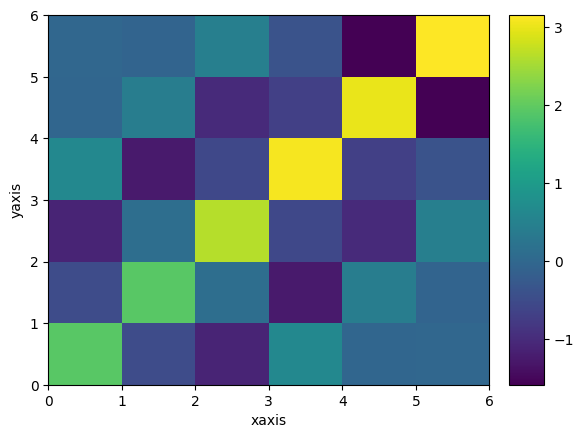

In [91]:
fileptr_1D['c_kkEmatrixCor_rebinnedA'].to_hist().plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f56718dc9a0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f56718dcdc0>, text=[])

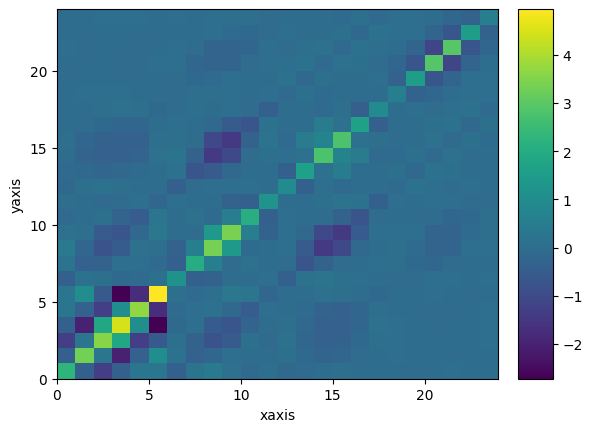

In [92]:
fileptr_2D['c_kk_mttbarEmatrixCor_rebinnedA'].to_hist().plot()

In [93]:
fileptr_1D["c_kkEmatrixCor_rebinnedB"].to_numpy()[0]

array([[ 2.09192704, -0.38206987, -1.39894681,  0.50408636,  0.36196641,
        -0.20268787],
       [-0.38206987,  1.97134481,  0.33943742, -1.4703265 ,  0.13858726,
         0.15697795],
       [-1.39894681,  0.33943742,  3.00953221, -0.52925532, -2.00104179,
         1.03091851],
       [ 0.50408636, -1.4703265 , -0.52925532,  3.15179868, -0.24588547,
        -0.91482742],
       [ 0.36196641,  0.13858726, -2.00104179, -0.24588547,  5.09183225,
        -3.06864622],
       [-0.20268787,  0.15697795,  1.03091851, -0.91482742, -3.06864622,
         4.39300875]])

In [94]:
fileptr_2D["c_kk_mttbarEmatrixCor_rebinnedB"].to_numpy()[0][0]

array([ 1.20584883e+00, -1.02251272e+00,  1.38093298e-01,  1.00468920e-01,
       -3.39996063e-02,  3.35739422e-02,  6.89035264e-01, -9.88547296e-01,
        3.26632219e-01,  1.20207345e-02, -4.75172250e-02,  1.33662544e-02,
       -3.11199882e-01,  3.06389970e-01, -7.00404035e-02,  9.84129766e-03,
        4.33540828e-03, -1.86841428e-04,  6.66698014e-02, -5.07635910e-02,
       -2.52053772e-03,  1.16512114e-02, -4.39782278e-03, -6.94147410e-04])

In [95]:
uncorrected_error_1D = fileptr_1D["c_kkEmatrix_rebinnedB"].to_numpy()[0]
corrected_error_1D   = fileptr_1D["c_kkEmatrixCor_rebinnedB"].to_numpy()[0]
normed_error_1D      = fileptr_1D["c_kkEmatrixNorm_rebinnedB"].to_numpy()[0]

In [96]:
# This is corrected by cross-section; so divide by fBR and fLumi
scaling = np.divide(uncorrected_error_1D, corrected_error_1D)
np.mean(scaling)

1596859.3415609999

In [97]:
# This is corrected using the Jacobian
scaling = np.divide(corrected_error_1D, normed_error_1D)
np.mean(scaling)

309645.0313921071

In [98]:
uncorrected_error_2D = fileptr_2D["c_kk_mttbarEmatrix_rebinnedB"].to_numpy()[0]
corrected_error_2D   = fileptr_2D["c_kk_mttbarEmatrixCor_rebinnedB"].to_numpy()[0]
normed_error_2D      = fileptr_2D["c_kk_mttbarEmatrixNorm_rebinnedB"].to_numpy()[0]

In [99]:
# This is corrected by cross-section; so divide by fBR and fLumi
scaling = np.divide(uncorrected_error_2D, corrected_error_2D)
np.mean(scaling)

1596859.3415610003

In [100]:
# This is corrected using the Jacobian
scaling = np.divide(corrected_error_2D, normed_error_2D)
np.mean(scaling)

667277.7547001328

In [101]:
for i in range(6) : 
    print(corrected_error_1D[i][i])
    print(corrected_error_2D[i][i])

2.0919270399637697
1.205848831474376
1.9713448125166764
4.873218117218399
3.0095322145751275
10.209599755650087
3.151798675240402
12.200003113616512
5.091832252405554
10.422145722086025
4.39300875305394
4.701451654888336


/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f56717ccf70>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

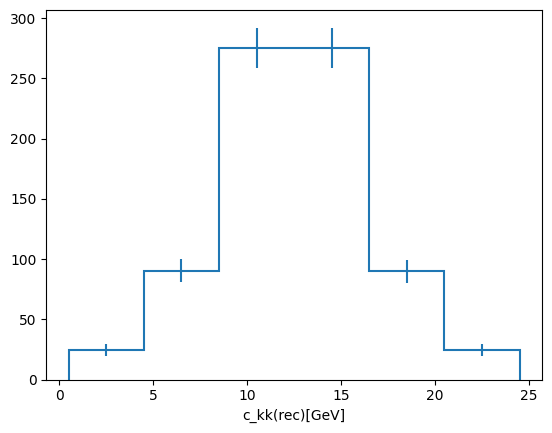

In [102]:
fileptr_1D['c_kkTUnfResultCor_rebinnedA'].to_hist().plot()

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f5671a21870>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

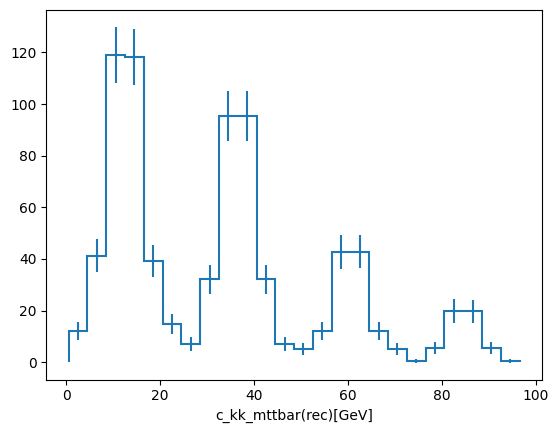

In [127]:
fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_hist().plot()

In [104]:
sum(fileptr_1D['c_kkTUnfResultCor_rebinnedA'].to_numpy()[0])

780.3734327893972

In [105]:
sum(fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0])

785.4506261137537

In [106]:
[k for k in fileptr_1D.keys() if '_Total' in k]

[]

In [107]:
sum(fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0][:6])

344.58651679052736

In [108]:
sum(fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0][6:12])

268.95106646457543

In [109]:
sum(fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0][12:18])

119.76712270225025

In [110]:
sum(fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0][18:])

52.1459201564006

In [67]:
binFileName = "/depot/cms/top/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/binning/c_kk_mttbar_binning_rebinnedB.xml"
parser = ROOT.TDOMParser()
parser.ParseFile(binFileName)

XMLdocument      = parser.GetXMLDocument();
generatorBinning = ROOT.TUnfoldBinningXML.ImportXML(XMLdocument,"generator_rebinnedB");
binning          = generatorBinning.FindNode("ttbargen_rebinnedB");

In [111]:
nbinsrhoi                  = len(corrected_error_2D)
binwidthcorrected_error_2D = np.zeros((nbinsrhoi, nbinsrhoi))

In [112]:
# Dividing covariance matrix by binwidth
for i in range(nbinsrhoi) :
    for j in range(nbinsrhoi) :
        binwidthcorrected_error_2D[i,j] = corrected_error_2D[i,j] / (binning.GetBinSize(i+1) * binning.GetBinSize(j+1))

In [113]:
stat_errors = []
for i in range(nbinsrhoi) :
    stat_errors.append(np.sqrt(binwidthcorrected_error_2D[i,i]))

In [120]:
# Dividing cross-section by binwidth
binwithcorrected_cross_section = np.zeros(nbinsrhoi)
for i in range(nbinsrhoi) :
    binwithcorrected_cross_section[i] = (fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0][i]/ binning.GetBinSize(i+1))

In [121]:
binwithcorrected_cross_section

array([1.83202574e-01, 6.18974838e-01, 1.78469556e+00, 1.77054145e+00,
       5.89931624e-01, 2.21441365e-01, 1.39234415e-01, 6.42772405e-01,
       1.90499653e+00, 1.90601690e+00, 6.43686398e-01, 1.42303919e-01,
       7.55452521e-02, 1.79386518e-01, 6.42076329e-01, 6.43137305e-01,
       1.79952501e-01, 7.64053418e-02, 1.42188068e-03, 1.41414284e-02,
       4.96371484e-02, 4.96210217e-02, 1.41486564e-02, 1.39440404e-03])

In [123]:
stat_errors

[0.016471639317962312,
 0.03311298371471517,
 0.04792860060975132,
 0.05239264949011314,
 0.04842492547817028,
 0.032524181635455174,
 0.023706141362067685,
 0.03333277438666896,
 0.04075890256594007,
 0.04085697607405779,
 0.03241376358264055,
 0.022885563553976442,
 0.014710799716875307,
 0.020995459735033403,
 0.02727385149577276,
 0.027319586464608768,
 0.020990102160287055,
 0.0145063393201287,
 0.0012920543361927845,
 0.002172498977570623,
 0.0030083111389897373,
 0.003010473324235324,
 0.0021742972523869117,
 0.001289195664448902]

In [138]:
np.divide(np.array(stat_errors), binwithcorrected_cross_section)

array([0.08990943, 0.05349649, 0.02685534, 0.02959131, 0.08208566,
       0.14687491, 0.17026065, 0.05185782, 0.02139579, 0.02143579,
       0.05035645, 0.16082174, 0.19472832, 0.11704034, 0.04247758,
       0.04247862, 0.11664246, 0.18986028, 0.90869393, 0.15362656,
       0.06060604, 0.06066931, 0.15367517, 0.92454957])

In [130]:
undivided_bwc_error = np.sqrt([corrected_error_2D[i][i] for i in range(24)])

In [131]:
undivided_bwc_error

array([1.09811148, 2.20753666, 3.19524643, 3.49285029, 3.22833482,
       2.16828311, 1.18530944, 1.66664205, 2.0379492 , 2.04285289,
       1.62069142, 1.14428047, 0.98072194, 1.39970012, 1.8182604 ,
       1.82130941, 1.39934294, 0.96709122, 0.51682277, 0.86900133,
       1.20332686, 1.20419174, 0.86972064, 0.5156793 ])

In [133]:
fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0]

array([ 12.21352938,  41.26507173, 118.97994193, 118.03633298,
        39.32885358,  14.76278719,   6.96173466,  32.13868454,
        95.25001705,  95.30103581,  32.18438425,   7.11521016,
         5.03636021,  11.95912514,  42.8051742 ,  42.8759061 ,
        11.99685741,   5.09369964,   0.56875341,   5.65658267,
        19.85489909,  19.84844837,   5.65947389,   0.55776273])

In [137]:
np.divide(undivided_bwc_error, fileptr_2D['c_kk_mttbarTUnfResultCor_rebinnedA'].to_numpy()[0]) 

array([0.08990943, 0.05349649, 0.02685534, 0.02959131, 0.08208566,
       0.14687491, 0.17026065, 0.05185782, 0.02139579, 0.02143579,
       0.05035645, 0.16082174, 0.19472832, 0.11704034, 0.04247758,
       0.04247862, 0.11664246, 0.18986028, 0.90869393, 0.15362656,
       0.06060604, 0.06066931, 0.15367517, 0.92454957])

In [140]:
undivided_unscaled_error = np.sqrt([uncorrected_error_2D[i][i] for i in range(24)])

In [143]:
fileptr_2D['c_kk_mttbarTUnfResult_rebinnedA'].to_numpy()[0]

array([ 15433.85845671,  52145.39192823, 150351.26424035, 149158.8548654 ,
        49698.65307055,  18655.27652493,   8797.32826976,  40612.659357  ,
       120364.49379995, 120428.96461911,  40670.40865643,   8991.27050597,
         6364.29227589,  15112.37570299,  54091.57168134,  54180.95338523,
        15160.05680207,   6436.75033052,    718.71605081,   7148.04815981,
        25090.02047595,  25081.86890398,   7151.70171239,    704.82747517])

/home/bakshi3/.conda/envs/cent7/2020.11-py38/venv/lib/python3.10/site-packages/mplhep/utils.py:211: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  warnings.warn(


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f568a1e94b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

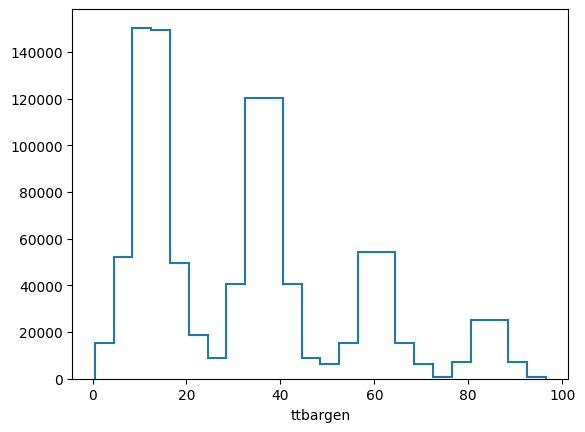

In [144]:
fileptr_2D['c_kk_mttbarTUnfResult_rebinnedA'].to_hist().plot()

In [145]:
np.divide(undivided_unscaled_error, fileptr_2D['c_kk_mttbarTUnfResult_rebinnedA'].to_numpy()[0])

array([0.08990943, 0.05349649, 0.02685534, 0.02959131, 0.08208566,
       0.14687491, 0.17026065, 0.05185782, 0.02139579, 0.02143579,
       0.05035645, 0.16082174, 0.19472832, 0.11704034, 0.04247758,
       0.04247862, 0.11664246, 0.18986028, 0.90869393, 0.15362656,
       0.06060604, 0.06066931, 0.15367517, 0.92454957])